<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/l6_final_revision_07_11_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4 MB 4.9 kB/s 
     |████████████████████████████████| 4.0 MB 44.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0 which is incompatible.


In [3]:
!pip install ipdb

     |████████████████████████████████| 790 kB 5.1 MB/s 
     |████████████████████████████████| 374 kB 46.1 MB/s 
  Created wheel for ipdb: filename=ipdb-0.13.9-py3-none-any.whl size=11648 sha256=8dad9a5e6a70b2f4622ccc300e83806c60fa6ade8cd88f96ebebd6133be5dc78
  Stored in directory: /root/.cache/pip/wheels/65/cd/cc/aaf92acae337a28fdd2aa4d632196a59745c8c39f76eaeed01
Successfully built ipdb
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 

In [1]:
from ipdb import set_trace as st

In [2]:
from fastai import *
from fastai.collab import *

In [ ]:
path = untar_data(URLs.ML_SAMPLE)

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/movie_lens_sample/ratings.csv')]

In [ ]:
df = pd.read_csv(path/'ratings.csv')

In [ ]:
df.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [ ]:
torch.Tensor([1, 2, 3])

tensor([1., 2., 3.])

In [ ]:
#test

a = nn.Embedding(5, 10)
b = nn.Embedding(5, 10)

rs = a(torch.Tensor([1, 2, 3]).long()) * b(torch.Tensor([1, 2, 3]).long())
rs.sum(1).shape

torch.Size([3])

In [ ]:
class my_collab(nn.Module):
  def __init__(self, nu, ni, n_factors, y_range):
    super().__init__()
    self.nu = nu
    self.ni = ni
    self.n_factors = n_factors
    self.y_range = y_range

    self.ue = nn.Embedding(nu, n_factors)
    self.ie = nn.Embedding(ni, n_factors)

    self.ueb = nn.Embedding(nu, 1)
    self.ieb = nn.Embedding(ni, 1)

  def range_sigmoid(self, results):
    
    temp = results.relu().sigmoid()
    return temp*self.y_range[1] + self.y_range[0]

  def forward(self , users, items):
    # st()
    res = self.ue(users) * self.ie(items)
    res1 = res.sum(1)
    print(res1.shape)
    res2 = res1 + self.ueb(users).squeeze()
    res3 = res2 + self.ieb(items).squeeze()
    return self.range_sigmoid(res3)
    # res = ().sum(1) + self.ueb(users) + self.ieb(items);
    #sigmoid in the range of res
    # return self.range_sigmoid(res)


In [ ]:
data = CollabDataBunch.from_df(df, user_name='userId', item_name='movieId', rating_name='rating')

In [ ]:
data.show_batch()

userId,movieId,target
23,32,4.0
664,4993,4.0
598,1213,4.0
460,778,4.0
199,589,5.0


In [ ]:
just = data.one_batch()  
type(just)

tuple

In [ ]:
users_s = set()
movies_s = set()
for (i, j) in zip(df['userId'], df['movieId']):
  users_s.add(i)
  movies_s.add(j)

In [ ]:
max(x), max(y)

(665, 58559)

In [ ]:
def get_learner(y_range, u, i):
  return my_collab(u, i, 50, y_range)

In [ ]:
learn = get_learner([0, 5.3])

In [ ]:
# loss_func = nn.CrossEntropyLoss()
loss_func = nn.MSELoss()

In [ ]:
data.one_batch()

([tensor([63, 52, 47, 47, 67, 41, 65, 98, 16, 73, 55,  7, 92, 98, 26, 73, 30, 86,
          46, 46, 83, 18, 82, 16, 63, 42,  3, 14, 53, 44, 47, 34, 85, 65, 50, 36,
          63, 92, 99, 36, 21,  8, 15, 60, 27, 59, 65, 43, 46, 80, 43, 41,  4, 82,
          86, 68, 36, 32, 54, 11, 74, 77, 73, 62]),
  tensor([81, 48, 28, 17,  4, 71, 63, 10, 44, 16, 79, 96, 25,  8, 29,  6, 68, 62,
          14, 80, 22,  9, 70, 27, 49, 49, 11,  2, 45, 73, 85, 68, 35, 75, 22, 88,
          46, 50,  1, 76, 65, 55, 86, 64,  5, 50, 52, 78, 40, 29, 76, 25, 75, 58,
          40, 20, 78, 17, 87, 46,  1, 23, 99, 24])],
 tensor([3.5000, 4.0000, 2.0000, 4.0000, 3.5000, 4.0000, 5.0000, 3.5000, 2.0000,
         5.0000, 3.5000, 4.0000, 4.5000, 4.5000, 4.5000, 4.0000, 5.0000, 4.0000,
         3.0000, 3.5000, 3.5000, 4.0000, 3.0000, 4.0000, 4.0000, 4.5000, 3.0000,
         3.5000, 5.0000, 3.0000, 3.0000, 4.0000, 4.5000, 3.5000, 3.0000, 5.0000,
         1.5000, 3.0000, 3.5000, 4.0000, 3.0000, 5.0000, 3.5000, 4.5000, 2.0000

In [ ]:
data.one_batch()

([tensor([ 38,  48,  11,  69,   9,  41,  16,  77,  18,  74,  27,  23,  83,  21,
           14,  84,  42,  78,  42,  70,  13,   4,  16,  33,  15,  75,  42,  15,
           59,  62,  19,  86,  94,  82,  11,  46, 100,  61,  71,  16,  93,   1,
           59,  82,  92,  59,  79,  15,  83,  19,  67,  65,  10,  21,   8,  77,
           37,  59,  26,  59,  66,  75,  65,  82]),
  tensor([ 25,  35,  34, 100,  82,  19,  64,  11,  62,  64,  92,  38,  57,  62,
            9,  31,  72,  18,  86,  24,  80,  82,  54,  12,  40,  20,  67,   6,
           65,  11,  92,   8,  20,  13,  46,  71,  77,  55,   1,   6,  75,  77,
           89,  46,  71,  90,  98,  20, 100,   5,  92,  14,  64,  90,  27,  43,
           43,  34,  83,  23,  51,  58,  74,  33])],
 tensor([4.5000, 5.0000, 3.0000, 5.0000, 4.5000, 4.0000, 4.0000, 4.0000, 4.5000,
         4.0000, 3.5000, 4.0000, 3.5000, 4.0000, 3.0000, 4.0000, 4.0000, 5.0000,
         3.5000, 5.0000, 4.0000, 4.0000, 5.0000, 4.0000, 3.0000, 5.0000, 4.5000,
         4.0

In [ ]:
max(x), max(y)

(665, 58559)

In [ ]:
d = torch.rand([3, 1])

In [ ]:
d.squeeze().shape

torch.Size([3])

In [ ]:
for j in range(10):
  j += 1
  i = data.one_batch()
  y = i[1]
  y_hat = learn(*i[0])
  loss = loss_func(y_hat, y)
  print(math.sqrt(loss))

torch.Size([64])
1.727181785302106
torch.Size([64])
1.5944855432533853
torch.Size([64])
1.5443493038866438
torch.Size([64])
1.5482200400571917
torch.Size([64])
1.472506487691217
torch.Size([64])
1.6030689133022007
torch.Size([64])
1.4206990839533882
torch.Size([64])
1.4398881728408166
torch.Size([64])
1.5544340607604812
torch.Size([64])
1.5630512790920095


In [ ]:
y_hat

tensor([1.4440e-04, 4.9964e+00, 1.7828e+00, 5.2976e+00, 5.2880e+00, 3.2576e-02,
        2.7121e+00, 2.2985e-02, 8.0191e-09, 2.0237e-04, 2.8789e-03, 2.8677e-05,
        1.8335e-02, 5.3000e+00, 6.9694e-02, 5.2716e+00, 2.7544e-01, 5.2328e+00,
        4.9658e+00, 5.2994e+00, 4.9291e-01, 5.3000e+00, 4.3414e-03, 1.3174e-04,
        5.0237e+00, 5.2708e+00, 5.1474e+00, 7.7606e-04, 5.2996e+00, 5.2981e+00,
        8.6103e-02, 1.9701e-02, 2.9602e+00, 6.2437e-04, 1.6256e-03, 5.6353e-01,
        3.5068e+00, 5.3000e+00, 6.3818e-01, 4.1624e+00, 1.2834e-05, 1.2644e-01,
        5.3000e+00, 5.3000e+00, 2.3291e-03, 5.2646e-02, 5.3000e+00, 5.2998e+00,
        8.1475e-01, 5.2870e+00, 5.2983e+00, 4.6267e-02, 5.2982e+00, 8.5606e-01,
        3.3513e-02, 2.6286e-04, 2.9436e+00, 5.3000e+00, 5.2951e+00, 6.3669e-01,
        3.9625e-02, 5.2999e+00, 4.9846e+00, 1.9753e-03],
       grad_fn=<AddBackward0>)

In [ ]:
y

tensor([1.0000, 3.5000, 4.0000, 2.0000, 5.0000, 2.5000, 5.0000, 2.0000, 4.0000,
        4.5000, 4.5000, 4.0000, 4.5000, 5.0000, 4.0000, 3.5000, 5.0000, 4.0000,
        5.0000, 3.5000, 3.0000, 4.5000, 1.0000, 4.0000, 5.0000, 5.0000, 3.0000,
        4.0000, 2.0000, 4.5000, 3.0000, 3.0000, 2.0000, 4.0000, 4.0000, 3.5000,
        3.0000, 5.0000, 1.0000, 4.5000, 3.5000, 4.0000, 3.0000, 4.5000, 4.0000,
        4.5000, 4.5000, 3.0000, 4.0000, 3.5000, 4.0000, 5.0000, 5.0000, 3.5000,
        3.0000, 5.0000, 3.0000, 4.5000, 4.0000, 3.0000, 5.0000, 2.0000, 3.0000,
        4.5000])

In [ ]:
test = data.one_batch()

In [ ]:
learn(*test[0])

torch.Size([64])
> <ipython-input-31-3040d36a97ba>(17)range_sigmoid()
     16     st()
---> 17     temp = results.relu().sigmoid()
     18     return temp*self.y_range[1] + self.y_range[0]

ipdb> n
> <ipython-input-31-3040d36a97ba>(18)range_sigmoid()
     17     temp = results.relu().sigmoid()
---> 18     return temp*self.y_range[1] + self.y_range[0]
     19 

ipdb> temp*self.y_range[1]
tensor([2.6500, 5.3000, 2.6500, 4.5948, 2.6500, 2.6500, 4.8298, 3.4639, 5.2370,
        5.2734, 2.6500, 2.6500, 2.6500, 2.6500, 3.9871, 2.6500, 2.6500, 2.6500,
        4.7827, 2.6500, 5.2975, 5.1062, 3.9128, 2.6500, 3.3275, 5.2985, 5.2995,
        2.6500, 5.2987, 5.2767, 5.3000, 5.2963, 2.6500, 5.2213, 5.0746, 2.6500,
        5.1815, 2.6500, 3.7644, 5.2967, 2.6500, 2.6500, 4.9414, 5.2998, 5.3000,
        2.6500, 2.6500, 2.6500, 2.6500, 5.3000, 2.6500, 2.6500, 4.3018, 2.6500,
        2.6500, 2.6500, 4.7462, 2.6500, 3.0490, 2.6500, 2.6500, 5.1130, 5.3000,
        2.6715], grad_fn=<MulBackward0>)
ipdb> los

tensor([2.6500, 5.3000, 2.6500, 4.5948, 2.6500, 2.6500, 4.8298, 3.4639, 5.2370,
        5.2734, 2.6500, 2.6500, 2.6500, 2.6500, 3.9871, 2.6500, 2.6500, 2.6500,
        4.7827, 2.6500, 5.2975, 5.1062, 3.9128, 2.6500, 3.3275, 5.2985, 5.2995,
        2.6500, 5.2987, 5.2767, 5.3000, 5.2963, 2.6500, 5.2213, 5.0746, 2.6500,
        5.1815, 2.6500, 3.7644, 5.2967, 2.6500, 2.6500, 4.9414, 5.2998, 5.3000,
        2.6500, 2.6500, 2.6500, 2.6500, 5.3000, 2.6500, 2.6500, 4.3018, 2.6500,
        2.6500, 2.6500, 4.7462, 2.6500, 3.0490, 2.6500, 2.6500, 5.1130, 5.3000,
        2.6715], grad_fn=<AddBackward0>)

In [ ]:
!pwd

/content


In [ ]:
!wget https://grouplens.org/datasets/movielens/100k/

--2021-10-17 08:15:45--  https://grouplens.org/datasets/movielens/100k/
Resolving grouplens.org (grouplens.org)... 128.101.34.235
Connecting to grouplens.org (grouplens.org)|128.101.34.235|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘index.html’

index.html              [ <=>                ]  14.05K  80.9KB/s    in 0.2s    

2021-10-17 08:15:46 (80.9 KB/s) - ‘index.html’ saved [14385]



In [ ]:
from google.colab import files

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-100k/?C=S;O=A

--2021-10-17 08:20:12--  https://files.grouplens.org/datasets/movielens/ml-100k/?C=S
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5371 (5.2K) [text/html]
Saving to: ‘index.html?C=S’

index.html?C=S      100%[===================>]   5.25K  --.-KB/s    in 0s      

2021-10-17 08:20:13 (307 MB/s) - ‘index.html?C=S’ saved [5371/5371]



In [ ]:
!wget --output-document=data/ml-100k.zip  https://grouplens.org/datasets/movielens/100k/

data/ml-100k.zip: No such file or directory


In [ ]:
files.upload()

Saving u.data to u.data
Saving u.genre to u.genre
Saving u.info to u.info
Saving u.item to u.item
Saving u.user to u.user


{'u.data': b'196\t242\t3\t881250949\n186\t302\t3\t891717742\n22\t377\t1\t878887116\n244\t51\t2\t880606923\n166\t346\t1\t886397596\n298\t474\t4\t884182806\n115\t265\t2\t881171488\n253\t465\t5\t891628467\n305\t451\t3\t886324817\n6\t86\t3\t883603013\n62\t257\t2\t879372434\n286\t1014\t5\t879781125\n200\t222\t5\t876042340\n210\t40\t3\t891035994\n224\t29\t3\t888104457\n303\t785\t3\t879485318\n122\t387\t5\t879270459\n194\t274\t2\t879539794\n291\t1042\t4\t874834944\n234\t1184\t2\t892079237\n119\t392\t4\t886176814\n167\t486\t4\t892738452\n299\t144\t4\t877881320\n291\t118\t2\t874833878\n308\t1\t4\t887736532\n95\t546\t2\t879196566\n38\t95\t5\t892430094\n102\t768\t2\t883748450\n63\t277\t4\t875747401\n160\t234\t5\t876861185\n50\t246\t3\t877052329\n301\t98\t4\t882075827\n225\t193\t4\t879539727\n290\t88\t4\t880731963\n97\t194\t3\t884238860\n157\t274\t4\t886890835\n181\t1081\t1\t878962623\n278\t603\t5\t891295330\n276\t796\t1\t874791932\n7\t32\t4\t891350932\n10\t16\t4\t877888877\n284\t304\t4\t885329322

In [ ]:
!ls

sample_data  u.data  u.genre  u.info  u.item  u.user


In [ ]:
!rm 'index.html?C=S'

In [ ]:
!pwd

/content


In [ ]:
path = Path('/content')
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/u.user'),
 PosixPath('/content/u.data'),
 PosixPath('/content/u.item'),
 PosixPath('/content/u.info'),
 PosixPath('/content/u.genre'),
 PosixPath('/content/sample_data')]

In [ ]:
users = pd.read_csv('u.user', delimiter= '|', names = ['age', 'gender', 'names', 'something'])
users.head()

,age,gender,names,something
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [ ]:
len( ['item', 'title', 'rel_d', 'something', 'img_url', *['g_' + str(i) for i in range(1, 20)]])

24

In [ ]:
items = pd.read_csv(path/'u.item', delimiter = '|', encoding='latin-1', header = None, names = ['item', 'title', 'rel_d', 'something', 'img_url', *['g_' + str(i) for i in range(1, 20)]])
items.head()

,item,title,rel_d,something,img_url,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
items['title']

0                                Toy Story (1995)
1                                GoldenEye (1995)
2                               Four Rooms (1995)
3                               Get Shorty (1995)
4                                  Copycat (1995)
                          ...                    
1677                            Mat' i syn (1997)
1678                             B. Monkey (1998)
1679                         Sliding Doors (1998)
1680                          You So Crazy (1994)
1681    Scream of Stone (Schrei aus Stein) (1991)
Name: title, Length: 1682, dtype: object

In [ ]:
data = pd.read_csv(path/'u.data', delimiter = '\t', header = None, names = ['user', 'item', 'rating', 'ts'])
data.head()

,user,item,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
data.merge(items, left_on='item', right_on='item')

,user,item,rating,ts,title,rel_d,something,img_url,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Mamma%20Roma%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,888474646,"Eighth Day, The (1996)",01-Nov-1996,NaN,"http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,888984255,Girls Town (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Girls%20Town%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Saimt%20el%20...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
nd = data.merge(items, left_on='item', right_on='item')

In [ ]:
nd

,user,item,rating,ts,title,rel_d,something,img_url,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962),01-Jan-1962,NaN,http://us.imdb.com/M/title-exact?Mamma%20Roma%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,888474646,"Eighth Day, The (1996)",01-Nov-1996,NaN,"http://us.imdb.com/Title?Huiti%E8me+jour,+Le+(...",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,888984255,Girls Town (1996),23-Aug-1996,NaN,http://us.imdb.com/M/title-exact?Girls%20Town%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1...",02-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Saimt%20el%20...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_bunch = CollabDataBunch.from_df(nd, user_name='user', item_name = 'title', rating_name='rating', valid_pct = 0.2)

In [ ]:
data_bunch.show_batch()

user,title,target
620,Lawnmower Man 2: Beyond Cyberspace (1996),2.0
416,Fly Away Home (1996),5.0
43,L.A. Confidential (1997),4.0
435,"Jungle Book, The (1994)",2.0
409,Live Nude Girls (1995),2.0


In [ ]:
users.head()

,age,gender,names,something
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [ ]:
items.head()

,item,title,rel_d,something,img_url,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9,g_10,g_11,g_12,g_13,g_14,g_15,g_16,g_17,g_18,g_19
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
len(users), len(items), len(data)

(943, 1682, 100000)

In [ ]:
uset = set()
iset = set()
for i in nd['user']:
  uset.add(i)

for j in nd['title']:
  iset.add(j)

In [ ]:
max(uset), len(iset)

(943, 1664)

In [ ]:
learn = get_learner([0.5, 5.5], len(users), len(items))

In [ ]:
learn

my_collab(
  (ue): Embedding(943, 50)
  (ie): Embedding(1682, 50)
  (ueb): Embedding(943, 1)
  (ieb): Embedding(1682, 1)
)

In [ ]:
data_bunch.one_batch()

([tensor([ 42, 500, 206, 495, 244, 130, 582, 111, 312, 264, 882, 110, 387, 292,
          294, 339, 610, 334, 889, 446, 435, 606, 747, 615, 589, 565, 435,  83,
          711, 648, 149,  94, 864, 821, 100, 405, 887, 774, 244, 113, 393, 200,
          620,  92, 279, 332,  94,  90, 453,  19, 563, 707, 780, 363, 406, 286,
          654, 201, 667, 148,  43, 303, 851, 894]),
  tensor([ 789,  451,    9,  132,  183,  719,  139,  532,  596,   59, 1608,  536,
          1191,  911,  234, 1288, 1548, 1287,  313,   33,  325,  646,  680,  861,
           614, 1108,  933,    3, 1090, 1317,  566,  202, 1299, 1084,  629,  633,
            24,  143,  113,  985, 1350,  530,  761,  545,  451, 1561, 1421,  426,
           770,  522, 1535,  279,  236,   43, 1483,    5, 1129,  843, 1274,  672,
            25, 1178,  101, 1241])],
 tensor([3., 2., 1., 5., 5., 4., 1., 4., 5., 4., 5., 3., 2., 5., 4., 3., 5., 3.,
         3., 3., 3., 5., 5., 3., 5., 4., 2., 3., 5., 4., 5., 3., 5., 5., 3., 1.,
         5., 1., 4.

In [ ]:
class my_collab(nn.Module):
  def __init__(self, nu, ni, n_factors, y_range):
    super().__init__()
    self.nu = nu
    self.ni = ni
    self.n_factors = n_factors
    self.y_range = y_range

    self.ue = nn.Embedding(nu, n_factors)
    self.ie = nn.Embedding(ni, n_factors)

    self.ueb = nn.Embedding(nu, 1)
    self.ieb = nn.Embedding(ni, 1)

  def range_sigmoid(self, results):
    
    temp = results.relu().sigmoid()
    return temp*self.y_range[1] + self.y_range[0]

  def forward(self , users, items):
    try:
      res = self.ue(users) * self.ie(items)
      res1 = res.sum(1)
      print(res1.shape)
      res2 = res1 + self.ueb(users).squeeze()
      res3 = res2 + self.ieb(items).squeeze()
      return self.range_sigmoid(res3)
    except:
      st()
      return 

    # res = ().sum(1) + self.ueb(users) + self.ieb(items);
    #sigmoid in the range of res
    # return self.range_sigmoid(res)


In [ ]:
def get_learner(y_range, u, i):
  return my_collab(u, i, 50, y_range)

In [ ]:
learn = get_learner([0.5, 5.5], len(users) + 1 , len(items) + 1)

In [ ]:
for j in range(10):
  j += 1
  i = data_bunch.one_batch()
  y = i[1]
  y_hat = learn(*i[0])
  loss = loss_func(y_hat, y)
  print(math.sqrt(loss))

torch.Size([64])
2.072972499791977
torch.Size([64])
1.9064192774921334
torch.Size([64])
2.0131735865057183
torch.Size([64])
1.942526603428186
torch.Size([64])
1.7636144888530367
torch.Size([64])
1.885352609575424
torch.Size([64])
1.9353007478632813
torch.Size([64])
2.113249773224742
torch.Size([64])
2.2279719659969492
torch.Size([64])
1.9570765080805694


In [ ]:
from fastai.collab import *

In [ ]:
learn = collab_learner(data_bunch, 50, y_range=[0.5, 5.5])

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


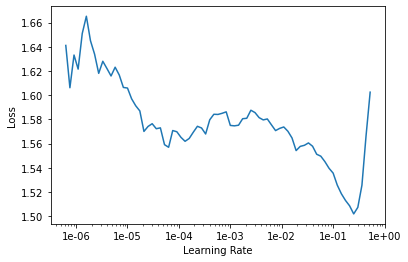

In [ ]:
learn.recorder.plot(skip_end=15)

In [ ]:
learn.fit_one_cycle(5, 1e-03)

epoch,train_loss,valid_loss,time
0,1.294621,1.278548,00:05
1,0.911864,0.931642,00:05
2,0.831520,0.884438,00:05
3,0.775571,0.869494,00:05
4,0.782472,0.867583,00:05


In [ ]:
learn.fit_one_cycle(5, 5e-04)

epoch,train_loss,valid_loss,time
0,0.757600,0.863728,00:05
1,0.757050,0.854254,00:05
2,0.714590,0.847829,00:05
3,0.706049,0.845605,00:05
4,0.674516,0.845171,00:05


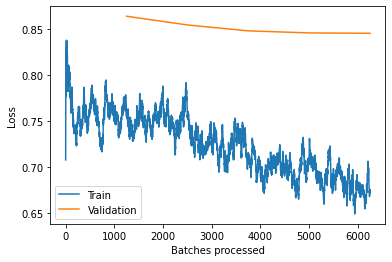

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit(1, 1e-02)

epoch,train_loss,valid_loss,time
0,0.882105,1.002119,00:05


In [ ]:
learn.fit(2, 8e-04)

epoch,train_loss,valid_loss,time
0,0.441313,0.954165,00:05
1,0.348816,0.946411,00:05


In [ ]:
learn.save('test-1')

In [ ]:
learn.fit(2, 1e-02)

epoch,train_loss,valid_loss,time
0,0.703658,1.149060,00:05
1,0.615997,1.211051,00:05


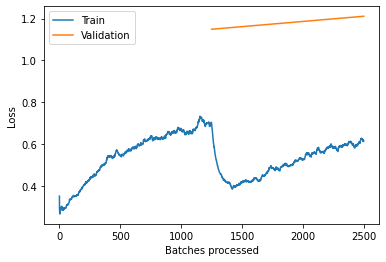

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.load('test-1')
learn.fit(2, 3e-2)

epoch,train_loss,valid_loss,time
0,2.287062,2.468812,00:05
1,2.383222,2.532493,00:05


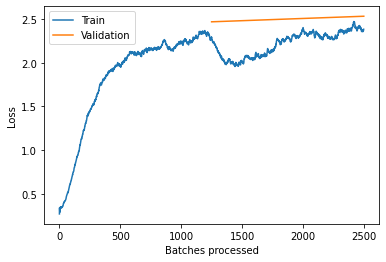

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(1, 2e-04)

epoch,train_loss,valid_loss,time
0,2.028991,2.508373,00:05


In [ ]:
data_bunch.train_ds, data_bunch.valid_ds

(LabelList (80000 items)
 x: CollabList
 user 63; title Kolya (1996); ,user 154; title Kolya (1996); ,user 306; title Kolya (1996); ,user 34; title Kolya (1996); ,user 271; title Kolya (1996); 
 y: FloatList
 3.0,3.0,5.0,5.0,4.0
 Path: .,
 LabelList (20000 items)
 x: CollabList
 user 883; title Three Colors: Blue (1993); ,user 92; title Alien (1979); ,user 57; title Sgt. Bilko (1996); ,user 455; title Boot, Das (1981); ,user 722; title Nixon (1995); 
 y: FloatList
 5.0,4.0,3.0,4.0,4.0
 Path: .)

In [ ]:
data_bunch.train_ds.x[0]

CollabLine [tensor(63), tensor(813)]

In [5]:
from fastai.vision import *

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [ ]:
test_img_path = (path/'training/6').ls()[0]

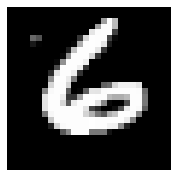

In [ ]:
img = open_image(test_img_path)
img.show()

In [ ]:
img.data.shape*2

torch.Size([3, 28, 28])

In [5]:
path_new = untar_data(URLs.MNIST_SAMPLE)

In [ ]:
path_new.ls()

[PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/labels.csv')]

In [ ]:
new_img = open_image((path_new/'train/7').ls()[0])

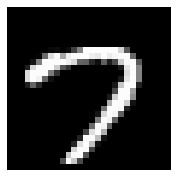

In [ ]:
new_img.show()

In [ ]:
new_img.data.shape

torch.Size([3, 28, 28])

In [ ]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2021-10-24 08:28:17--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... failed: Connection timed out.
Retrying.

--2021-10-24 08:30:29--  (try: 2)  http://deeplearning.net/data/mnist/mnist.pkl.gz
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... ^C


In [ ]:
path_sample = untar_data(URLs.MNIST_TINY)

In [ ]:
path_sample.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/valid'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/test'),
 PosixPath('/root/.fastai/data/mnist_tiny/models'),
 PosixPath('/root/.fastai/data/mnist_tiny/labels.csv')]

In [ ]:
(path_sample/'train').ls()

[PosixPath('/root/.fastai/data/mnist_tiny/train/7'),
 PosixPath('/root/.fastai/data/mnist_tiny/train/3')]

In [ ]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [ ]:
(path/'training').ls()

[PosixPath('/root/.fastai/data/mnist_png/training/6'),
 PosixPath('/root/.fastai/data/mnist_png/training/2'),
 PosixPath('/root/.fastai/data/mnist_png/training/9'),
 PosixPath('/root/.fastai/data/mnist_png/training/8'),
 PosixPath('/root/.fastai/data/mnist_png/training/1'),
 PosixPath('/root/.fastai/data/mnist_png/training/7'),
 PosixPath('/root/.fastai/data/mnist_png/training/5'),
 PosixPath('/root/.fastai/data/mnist_png/training/4'),
 PosixPath('/root/.fastai/data/mnist_png/training/3'),
 PosixPath('/root/.fastai/data/mnist_png/training/0')]

In [ ]:
(path/'training/2').ls()[:2]

[PosixPath('/root/.fastai/data/mnist_png/training/2/25020.png'),
 PosixPath('/root/.fastai/data/mnist_png/training/2/16351.png')]

In [ ]:
img_path = (path/'training/2').ls()[0]

In [ ]:
img = open_image(img_path)

In [ ]:
img.data.shape, img.data.squeeze().shape

(torch.Size([3, 28, 28]), torch.Size([3, 28, 28]))

In [ ]:
img.data.reshape(3*28*28).shape

torch.Size([2352])

In [ ]:
img.data.reshape((-1))

tensor([])

In [ ]:
x = torch.clone(img.data.reshape((-1)))
x.shape

torch.Size([2352])

In [ ]:
(path/'training/2').name

'2'

In [6]:
x_train, y_tran, x_valid, y_valid = [], [], [], []
def load_data(f_path):
  #used for loading training and testing data
  data = []
  ss = set()
  for i in f_path.ls():
    label = i.name
    ss.add(label)
    print(label, len(i.ls()))
    for j in i.ls():
      im_data = torch.clone(open_image(j).data.reshape(-1))
      data.append((im_data, int(label)))
    print(ss)
  return data

train, valid = [], []

train = load_data(path/'training')

5 5421
{'5'}
4 5842
{'4', '5'}
3 6131
{'4', '5', '3'}
0 5923
{'4', '5', '0', '3'}
1 6742
{'0', '4', '1', '3', '5'}
7 6265
{'0', '7', '4', '1', '3', '5'}
8 5851
{'0', '8', '7', '4', '1', '3', '5'}
9 5949
{'0', '8', '7', '4', '9', '1', '3', '5'}
2 5958
{'0', '8', '7', '4', '9', '1', '2', '3', '5'}
6 5918
{'0', '8', '6', '7', '4', '9', '1', '2', '3', '5'}


In [7]:
new_data = torch.clone(train[10000][0].reshape((3, 28, 28)))

In [ ]:
new_data.shape

torch.Size([3, 28, 28])

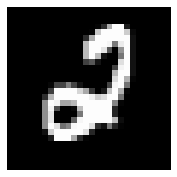

In [ ]:
show_image(new_data)

In [8]:
import random
random.shuffle(train)

In [9]:
from copy import deepcopy

In [10]:
all_data = deepcopy(train)

In [11]:
train, valid = None, None

In [12]:
random.shuffle(all_data)
train = all_data[:48000]

In [13]:
valid = all_data[48000:]

In [16]:
len(train), len(valid)

(48000, 12000)

In [17]:
train[12000]

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), 3)

In [14]:
x_train, y_train, x_valid, y_valid = [], [], [], []
for i in train:
  x_train.append((i[0]).unsqueeze(0))
  y_train.append(i[1])

for j in valid:
  x_valid.append(j[0].unsqueeze(0))
  y_valid.append(j[1])

In [51]:
x_train[0], y_train[0]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.]]), tensor(2))

In [15]:
x_train_tensor = torch.cat(x_train, dim = 0)

In [71]:
x_valid[0].shape

torch.Size([1, 2352])

In [16]:
x_valid_tensor = torch.cat(x_valid, dim = 0)

In [74]:
x_train_tensor.shape, x_valid_tensor.shape

(torch.Size([48000, 2352]), torch.Size([12000, 2352]))

In [17]:
y_train_tensor, y_valid_tensor = map(torch.Tensor, (y_train, y_valid))

In [22]:
y_train_tensor.shape, y_valid_tensor.shape

(torch.Size([48000]), torch.Size([12000]))

In [18]:
x_train, y_train, x_valid, y_valid = x_train_tensor, y_train_tensor, x_valid_tensor, y_valid_tensor

(<matplotlib.axes._subplots.AxesSubplot at 0x7ff75313fcd0>, tensor(1.))

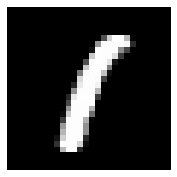

In [24]:
show_image(x_train[0].reshape(3, 28, 28)), y_train[0]

In [19]:
train = TensorDataset(x_train, y_train)

In [20]:
valid = TensorDataset(x_valid, y_valid)

In [21]:
bs = 64

In [22]:
data = DataBunch.create(train, valid, bs = bs)

In [29]:
x, y = next(iter(data.train_dl))

In [30]:
x.shape, y.shape

(torch.Size([64, 2352]), torch.Size([64]))

In [23]:
class Logistic(nn.Module):
  def __init__(self, in_factors, out_factors):
    super().__init__()
    self.layer = nn.Linear(in_factors, out_factors, bias = True)
    self.relu = nn.ReLU()
  
  def forward(self, x):
    res = self.layer(x)
    return self.relu(res)

In [108]:
model = Logistic(2352, 10).cuda()

In [33]:
model = model.cuda()

In [34]:
y_hat = model(x)

In [35]:
y_hat.shape

torch.Size([64, 10])

In [36]:
y_hat[0]

tensor([0.0000, 0.1138, 0.0000, 0.0000, 0.0000, 0.0559, 0.0000, 0.0000, 0.0000,
        0.0000], device='cuda:0', grad_fn=<SelectBackward>)

In [37]:
y[0]

tensor(6., device='cuda:0')

In [28]:
loss_func = nn.CrossEntropyLoss()

In [43]:
s = 0
for i in model.parameters():
  break

In [53]:
w_sum = 0
w_sum = [i.sum() for i in model.parameters()]

In [56]:
sum(w_sum), w_sum

(tensor(-2.2389, device='cuda:0', grad_fn=<AddBackward0>),
 [tensor(-2.2415, device='cuda:0', grad_fn=<SumBackward0>),
  tensor(0.0027, device='cuda:0', grad_fn=<SumBackward0>)])

In [ ]:
1. data - done
2. model - done
3. Loss Function - done
4. Back prop

0.01

In [24]:
#back prop
def update_weights(x, y, lr = 1e-02, wd = 1e-05):

  yhat = model(x)
  loss = loss_func(yhat, y.long())

  #weight decay
  w_sum = sum([(i**2).sum() for i in model.parameters()])
  loss = loss + w_sum * wd

  #calculate gradients
  loss.backward()
  # print(loss.item())

  #update weights
  with torch.no_grad():
    for param in model.parameters():
      param.sub_(lr*param.grad)
      param.grad.zero_()
  
  return loss.item()

In [25]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    # weight decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    # add to regular loss
    loss = loss_func(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [26]:
class Logistic(nn.Module):
  def __init__(self, in_factors, out_factors):
    super().__init__()
    self.layer = nn.Linear(in_factors, out_factors, bias = True)
    self.relu = nn.ReLU()
  
  def forward(self, x):
    res = self.layer(x)
    return self.relu(res)

In [29]:
model = Logistic(2352, 10).cuda()
losses = [update(x, y.long(), lr = 2e-02) for x, y in data.train_dl]
# for i in range(100):
#   x, y = next(iter(data.train_dl))
#   losses.append(update(x, y.long(), lr = 2e-02))

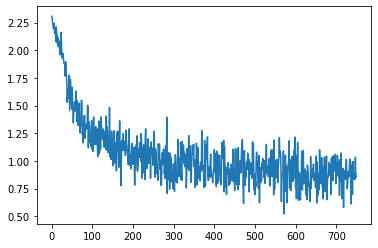

In [143]:
plt.plot(losses)

In [30]:
model = Logistic(2352, 10).cuda()
m_losses = [update_weights(x, y.long(), lr = 1e-02, wd = 1e-05) for x, y in data.train_dl]

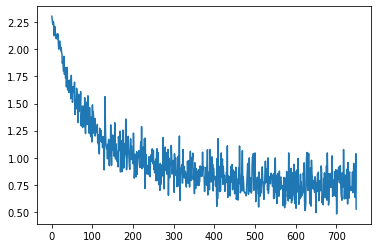

In [31]:
#with Weight decay
model = Logistic(2352, 10).cuda()
m_losses = [update_weights(x, y.long(), lr = 1e-02, wd = 1e-05) for x, y in data.train_dl]
plt.plot(m_losses)

In [156]:
min(m_losses)

0.3003143072128296

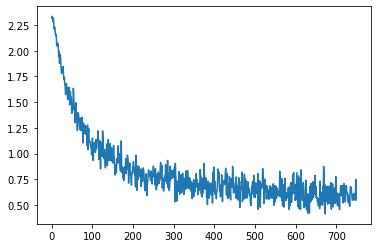

In [32]:
#with more weight decay
model = Logistic(2352, 10).cuda()
m_losses = [update_weights(x, y.long(), lr = 1e-02, wd = 1e-02) for x, y in data.train_dl]
plt.plot(m_losses)

In [162]:
min(m_losses)

0.4082297086715698

In [163]:
'''
1. multi layer liners
2. use optim
'''

'\n\n'

In [61]:
#multi layer nn
class Logistic_NN(nn.Module):
  
  def __init__(self, in_factors, out_factors):
    super().__init__()
    self.layer_0 = nn.Linear(in_factors, 100, bias = True)
    self.layer_1 = nn.Linear(100, 50, bias = True)
    self.layer_2 = nn.Linear(50, out_factors, bias = True)
    self.relu = nn.ReLU()
    self.model = nn.Sequential(self.layer_0, self.relu, self.layer_1, self.relu, self.layer_2, self.relu)
  
  def forward(self, x):
    return self.model(x)


In [59]:
model = Logistic_NN(2352, 10).cuda()
# model(x, y)

In [42]:
model = nn.Sequential(nn.Linear(2352, 500, bias = True), nn.ReLU(), nn.Linear(500, 50, bias = True), nn.ReLU(), nn.Linear(50, 10, bias = True), nn.ReLU()).cuda()

In [40]:
for x, y in data.train_dl:
  break

In [46]:
model = Logistic_NN(2352, 10).cuda()

0.9251804947853088
0.42910194396972656
0.3003215789794922
0.2705538868904114
0.25859561562538147


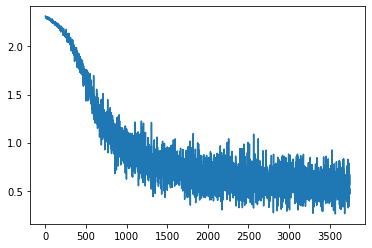

In [74]:
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights(x, y, lr = 7e-03, wd = 1e-04))
  print(min(m_losses))
plt.plot(m_losses)

In [78]:
for i in model.parameters():
  print(i.shape, len(i.shape))

torch.Size([100, 2352]) 2
torch.Size([100]) 1
torch.Size([50, 100]) 2
torch.Size([50]) 1
torch.Size([10, 50]) 2
torch.Size([10]) 1


In [85]:
def get_lr(p_shape, lr, epoc_number):

  if (epoc_number < 3):
    return lr
  
  if (p_shape[0] == 100):
    return lr/10
  elif (p_shape[0] == 50):
    return lr/5
  else:
    return lr

def update_weights_new(x, y, lr = 1e-02, wd = 1e-05, epoc_number = 0):

  yhat = model(x)
  loss = loss_func(yhat, y.long())

  #weight decay
  w_sum = sum([(i**2).sum() for i in model.parameters()])
  loss = loss + w_sum * wd

  #calculate gradients
  loss.backward()
  # print(loss.item())

  #update weights
  with torch.no_grad():
    for param in model.parameters():
      this_lr = get_lr(param.shape, lr, epoc_number)
      param.sub_(this_lr*param.grad)
      param.grad.zero_()
  
  return loss.item()

1.3514457941055298
0.6699257493019104
0.5334895253181458
0.5034016370773315
0.4702443778514862


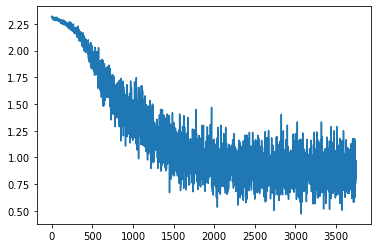

In [86]:
#differential learning rates
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_new(x, y, lr = 7e-03, wd = 1e-04, epoc_number = i))
  print(min(m_losses))
plt.plot(m_losses)

0.773781418800354
0.41474029421806335
0.23888632655143738
0.12720324099063873
0.12720324099063873


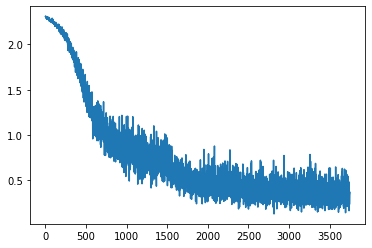

In [87]:
#non differential learning rates
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_new(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0))
  print(min(m_losses))
plt.plot(m_losses)

1.354638695716858
0.6820834875106812
0.5159622430801392
0.45617273449897766
0.38487696647644043


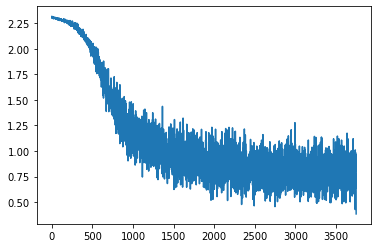

In [88]:
#non differential learning rates
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_new(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0))
  print(min(m_losses))
plt.plot(m_losses)

In [101]:
def add_momentum(grad, momentum):
  if grad.shape in st_1_update:
    last_update = st_1_update[grad.shape]
    this_update = ((1 - momentum) * grad + momentum*last_update)
    st_1_update[grad.shape] = this_update
    return this_update
  else:
    st_1_update[grad.shape] = grad
    return grad

def update_weights_momentum(x, y, lr = 1e-02, wd = 1e-05, epoc_number = 0, momentum = 0.9):

  yhat = model(x)
  loss = loss_func(yhat, y.long())

  #weight decay
  w_sum = sum([(i**2).sum() for i in model.parameters()])
  loss = loss + w_sum * wd

  #calculate gradients
  loss.backward()
  # print(loss.item())

  #update weights
  with torch.no_grad():
    for param in model.parameters():
      gradient_w_momentum = add_momentum(param.grad, momentum)
      param.sub_(lr*gradient_w_momentum)
      param.grad.zero_()
  
  return loss.item()

1.5246297121047974
0.7913461327552795
0.630105197429657
0.423865407705307
0.423865407705307


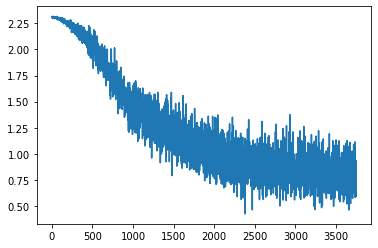

In [99]:
#non differential learning rates
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_new(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0))
  print(min(m_losses))
plt.plot(m_losses)

1.1596581935882568
0.409853994846344
0.29828402400016785
0.22640153765678406
0.22640153765678406


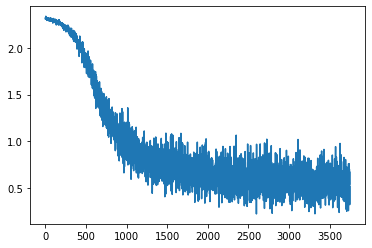

In [107]:
#with Momentum -- this is a fluke
st_1_update = {}
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_momentum(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0, momentum = 0.3))
  print(min(m_losses))
plt.plot(m_losses)

1.1705348491668701
0.6791664958000183
0.37627241015434265
0.3318050503730774
0.28226006031036377


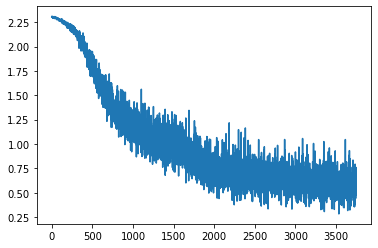

In [102]:
#with Momentum
st_1_update = {}
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_momentum(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0, momentum = 0.9))
  print(min(m_losses))
plt.plot(m_losses)

1.7338329553604126
1.018974781036377
0.6899964809417725
0.6784319281578064
0.5592471957206726


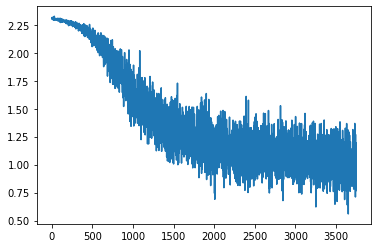

In [112]:
#with Momentum
st_1_update = {}
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_momentum(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0, momentum = 0.99))
  print(min(m_losses))
plt.plot(m_losses)

In [135]:
def get_update_using_rms_prop(grad, momentum):
  # st()
  if (grad.shape in grad_moving_averages):
    moving_average = grad_moving_averages[grad.shape]
    new_moving_average = (1-momentum)*(grad**2) + momentum*moving_average
    grad_moving_averages[grad.shape] = new_moving_average

    this_update = grad/(torch.sqrt(new_moving_average))
    return this_update
  else:
    grad_moving_averages[grad.shape] = grad**2
    return grad

def update_weights_rms_prop(x, y, lr = 1e-02, wd = 1e-05, epoc_number = 0, momentum = 0.9):

  yhat = model(x)
  loss = loss_func(yhat, y.long())

  #weight decay
  w_sum = sum([(i**2).sum() for i in model.parameters()])
  loss = loss + w_sum * wd

  #calculate gradients
  loss.backward()
  # print(loss.item())

  #update weights
  with torch.no_grad():
    for param in model.parameters():
      gradient_w_rms_prop = get_update_using_rms_prop(param.grad, momentum)
      param.sub_(lr*gradient_w_rms_prop)
      param.grad.zero_()
  
  return loss.item()

In [140]:
from statistics import mean

0.10237778723239899 2.3685550689697266 0.5365676845510801
0.10086330771446228 2.3685550689697266 0.4237662278463443
0.09705721586942673 2.3685550689697266 0.3827876839207278
0.09705721586942673 2.3685550689697266 0.36031031639625627
0.09648022800683975 2.3685550689697266 0.34818861077626545


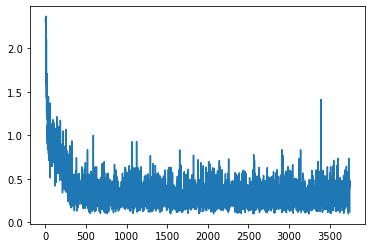

In [143]:
#with rms prop
grad_moving_averages = {}
model = None
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_rms_prop(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0, momentum = 0.9))
  print(min(m_losses), max(m_losses), mean(m_losses))
plt.plot(m_losses)

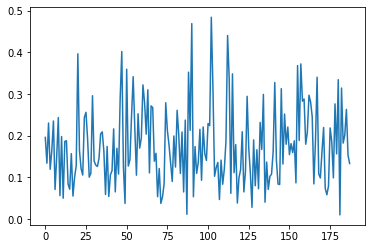

In [145]:
#rms prop
valid_losses = []
for x, y in data.valid_dl:
  y_hat = model(x)
  loss = loss_func(y_hat, y.long())
  valid_losses.append(loss.item())
plt.plot(valid_losses)

In [146]:
print(min(valid_losses), max(valid_losses), mean(valid_losses))

0.00992981344461441 0.4841880202293396 0.17528281917676647


In [ ]:
#adam

#calculate update using rms_prop
#apply momentum using the prev updates


In [149]:
def get_update_using_adam(grad, rms_momentum, momentum):

  if (grad.shape in grad_moving_averages):
    moving_average = grad_moving_averages[grad.shape]
    new_moving_average = (1-momentum)*(grad**2) + momentum*moving_average
    grad_moving_averages[grad.shape] = new_moving_average

    this_update_rms = grad/(torch.sqrt(new_moving_average))
    this_update = update_moving_agerages[grad.shape]*momentum + (1 - momentum)*this_update_rms

    return this_update

  else:
    grad_moving_averages[grad.shape] = grad**2
    update_moving_agerages[grad.shape] = grad
    return grad

def update_weights_adam(x, y, lr = 1e-02, wd = 1e-05, epoc_number = 0, momentum = 0.9):

  yhat = model(x)
  loss = loss_func(yhat, y.long())

  #weight decay
  w_sum = sum([(i**2).sum() for i in model.parameters()])
  loss = loss + w_sum * wd

  #calculate gradients
  loss.backward()
  # print(loss.item())

  #update weights
  with torch.no_grad():
    for param in model.parameters():
      gradient_w_rms_prop = get_update_using_adam(param.grad, momentum, momentum)
      param.sub_(lr*gradient_w_rms_prop)
      param.grad.zero_()
  
  return loss.item()

0.11279595643281937 2.31801700592041 0.5676952287256718
0.04807283729314804 2.31801700592041 0.38356731707602737
0.039128683507442474 2.31801700592041 0.30412520915104285
0.03186674788594246 2.31801700592041 0.25818434314305583
0.029989266768097878 2.31801700592041 0.22736188648492098


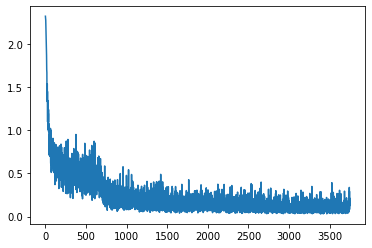

In [151]:
#with rms prop
grad_moving_averages = {}
update_moving_agerages = {}
model = None
model = Logistic_NN(2352, 10).cuda()
m_losses = []
for i in range(5):
  for x, y in data.train_dl:
    m_losses.append(update_weights_adam(x, y, lr = 7e-03, wd = 1e-04, epoc_number = 0, momentum = 0.9))
  print(min(m_losses), max(m_losses), mean(m_losses))
plt.plot(m_losses)

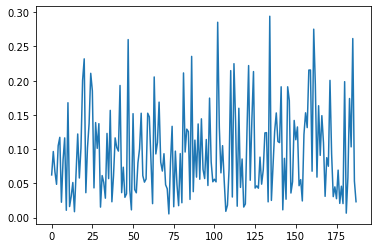

In [153]:
#adam optimizer
valid_losses = []
for x, y in data.valid_dl:
  y_hat = model(x)
  loss = loss_func(y_hat, y.long())
  valid_losses.append(loss.item())
plt.plot(valid_losses)

In [154]:
print(min(valid_losses), max(valid_losses), mean(valid_losses))

0.0053504034876823425 0.29416608810424805 0.09515258513311757
